# Final Analysis

## Loading the data

In [1]:
import pandas

# see 5_verse_lines_with_meter.ipynb for details on this file
df_rv_lines_with_meter = pandas.read_csv("data/rv_lines_with_meter.csv", keep_default_na=False)

#df_rv_lines.head()
df_rv_lines_with_meter

,line_no,stem,stem_type,root_guess,variant_no,weak_only,attestation_texts,language_period,present_class,root,...,meter_fault_positions,text_samhitapatha_normalized,meter_stem_found,meter_stem_positions,meter_stem_fault_positions,meter_stem_vowel_position,meter_stem_root_vowel_position,meter_stem_fault_position_labels,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected
0,01.063.02.d,iṣṇā,strong,iṣ,,False,,Earlier,ninth,iṣ 1,...,[],púra iṣṇā́si puruhūta pūrvī́ḥ,iṣṇā,"[3, 4]",[],4,3,,X,X
1,01.063.04.b,ubhnā,strong,ubh,,False,V.,Earlier,ninth,ubh,...,[],vr̥tráṁ yád vajrin vr̥ṣakarman ubhnā́ḥ,ubhnā,"[10, 11]",[],11,10,,X,L
2,04.019.04.c,ubhnā,strong,ubh,,False,V.,Earlier,ninth,ubh,...,[],dr̥̄ḷhā́ni aubhnād uśámāna ójo,ubhnā,"[4, 5]",[],5,4,,,
3,04.018.12.d,kṣiṇā,strong,kṣi,,False,V.B.,Earlier,ninth,kṣī,...,[],yát prā́kṣiṇāḥ pitáram pādagŕ̥hya,kṣiṇā,"[2, 3, 4]",[],4,3,,X,X
4,10.027.04.d,kṣiṇā,strong,kṣi,,False,V.B.,Earlier,ninth,kṣī,...,[],prá táṁ kṣiṇām párvate pādagŕ̥hya,kṣiṇā,"[3, 4]",[],4,3,,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,09.097.04.b,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],sómaṁ hinota mahaté dhánāya,hino,"[3, 4]",[],4,3,,X,X
877,10.016.09.a,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],kravyā́dam agním prá hiṇomi dūráṁ,hiṇo,"[7, 8]",[],8,7,,L,S
878,10.030.07.d,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],devamā́danam prá hiṇotanāpaḥ,hiṇo,"[7, 8]",[],8,7,,L,S
879,10.030.08.a,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],prā́smai hinota mádhumantam ūrmíṁ,hino,"[3, 4]",[],4,3,,X,X


In [2]:
df_rv_lines_with_meter.dtypes

line_no                                              object
stem                                                 object
stem_type                                            object
root_guess                                           object
variant_no                                           object
weak_only                                              bool
attestation_texts                                    object
language_period                                      object
present_class                                        object
root                                                 object
book                                                  int64
hymn                                                float64
stanza                                               object
pada_id                                              object
pada_label                                           object
word                                                 object
word_position_no                        

List of columns useful for our analysis:

In [3]:
COLUMNS_BASE = [
    # our variables
    "present_class", "stem_type", "stem",
    # stem attestations
    "line_no", "text_samhitapatha", 
    # meter scansion
    "stanza_meter", "meter_scansion_custom",
    # stem in the meter
    "meter_stem_vowel_position_scansion_expected",
    "meter_stem_root_vowel_position_scansion_expected",
    "meter_stem_positions",
    # meter faults and notes
    "meter_faults",
    "meter_notes", "meter_has_restorations",
    # pada and stanza metadata
    "pada_label", "stanza_strata", "stanza_late_addition",
    "word", "word_gloss",
]

Ensure that the stanza strata is ordered chronologically when sorting by it:

In [4]:
df_rv_lines_with_meter["stanza_strata"] = pandas.Categorical(
    df_rv_lines_with_meter["stanza_strata"],
    [
        "A", # archaic
        "S", # strophic
        "N", # normal
        "C", # cretic
        "P", # popular
        "a", "s", "n", "c", "p", # minor stratas
    ]
)

## Filtering the data

For our final analaysis, remove lines that:

* belong to stanzas with meter not specified
* follow the epic variant of the anustubh meter (this is a later creation and does not conform to the earlier anustubh standard)

In [5]:
# TODO! add others criterias?
# TODO! should do pada_label check without the P;
df_rv_lines_with_meter_filtered = df_rv_lines_with_meter \
    .query('\
        stanza_meter != "" \
        and pada_label not in ["PE3b", "PE3a", "PE2", "PE1"] \
    ')

# remove duplicates as well
# TODO something else than first() here?
#df_rv_lines_with_meter_filtered = df_rv_lines_with_meter \
#    .sort_values("line_no").groupby(["text_samhitapatha"]).first() \
#    .query('\
#        stanza_meter != "" \
#        and pada_label not in ["PE3b", "PE3a", "PE2", "PE1"] \
#    ')
# see the duplicate lines
#df_rv_lines_with_meter_filtered["text_samhitapatha"].value_counts()
#df_rv_lines_with_meter_filtered["word"].value_counts()

df_rv_lines_with_meter_filtered[COLUMNS_BASE]

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
0,ninth,strong,iṣṇā,01.063.02.d,púra iṣṇā́si puruhūta pūrvī́ḥ,Triṣṭubh,"SS LLS ,SS|LS LL",X,X,"[3, 4]",,,False,M,A,,iṣṇā́si,2.SG.PRS.IND.ACT
1,ninth,strong,ubhnā,01.063.04.b,vr̥tráṁ yád vajrin vr̥ṣakarman ubhnā́ḥ,Triṣṭubh,"LL L LL ,SS|LS_LL",X,L,"[10, 11]",,,False,Mh,A,,ubhnā́ḥ,3.SG.PRS.INJ.ACT
3,ninth,strong,kṣiṇā,04.018.12.d,yát prā́kṣiṇāḥ pitáram pādagŕ̥hya,Triṣṭubh,"L LSL ,SSL |LSLS",X,X,"[2, 3, 4]",,,False,P,P,"['Grassmann (G)', 'Arnold (C1)']",ákṣiṇāḥ,2.SG.IPRF.IND.ACT
4,ninth,strong,kṣiṇā,10.027.04.d,prá táṁ kṣiṇām párvate pādagŕ̥hya,Triṣṭubh,"S L SL ,LSL |LSLS",X,X,"[3, 4]",,,False,P,P,['Arnold (C1)'],kṣiṇām,1.SG.PRS.INJ.ACT
5,ninth,strong,kṣiṇā,10.027.13.c,ā́sīna ūrdhvā́m upási kṣiṇāti,Triṣṭubh,"LLS LL,_SS|_LSLS",L,S,"[8, 9, 10]",,caesura_position_inside_syllable=True,False,P,P,['Arnold (C1)'],kṣiṇāti,3.SG.PRS.IND.ACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,fifth,strong,hino,09.097.04.b,sómaṁ hinota mahaté dhánāya,Triṣṭubh,"LL SLS ,SS|L SLS",X,X,"[3, 4]",,,False,M,N,,hinota,2.PL.PRS.IMP.ACT
877,fifth,strong,hino,10.016.09.a,kravyā́dam agním prá hiṇomi dūráṁ,Triṣṭubh,"LLS_LL ,S S|LS LL",L,S,"[7, 8]",,,False,P,P,['Arnold (C2)'],hinomi,1.SG.PRS.IND.ACT
878,fifth,strong,hino,10.030.07.d,devamā́danam prá hiṇotanāpaḥ,Triṣṭubh,"LSLSL ,S S|LSLL",L,S,"[7, 8]",,,False,M,N,,hinotana,2.PL.PRS.IMP.ACT
879,fifth,strong,hino,10.030.08.a,prā́smai hinota mádhumantam ūrmíṁ,Triṣṭubh,"LL SLS ,SS|LS_LL",X,X,"[3, 4]",,,False,M,N,,hinota,2.PL.PRS.IMP.ACT


## Analysis

### 1. Lines with variant stem attestations

In [6]:
# note the use of unfiltered data here: since we are not dealing with meter positions
# here, we actually want to catch stem variations across all our data
df_rv_lines_with_meter[["meter_stem_found"] + COLUMNS_BASE] \
    .query('meter_stem_found != stem and present_class == "ninth"')

,meter_stem_found,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
48,minī,ninth,weak,minī mīnī,01.025.01.c,minīmási dyávi-dyavi,Gāyatrī,SLS_L|SLSS,X,X,"[1, 2]",,,True,M,S,,minīmási,1.PL.PRS.IND.ACT
49,minī,ninth,weak,minī mīnī,10.134.07.a,nákir devā minīmasi,,SL LL SLSS,,,"[5, 6]",,,False,M,S,['Grassmann (G)'],minīmasi,1.PL.PRS.IND.ACT
50,minā,ninth,strong,minā mīnā,01.032.04.b,ā́n māyínām ámināḥ prótá māyā́ḥ,Triṣṭubh,"L LSL,_SSL |LS LL",X,S,"[6, 7]",,caesura_position_inside_syllable=True,False,M,C,,ámināḥ,2.SG.PRS.IND.ACT
51,minā,ninth,strong,minā mīnā,01.071.10.c,nábho ná rūpáṁ jarimā́ mināti,Triṣṭubh,"SL S LL ,SS|L SLS",L,S,"[9, 10]",,,False,M,N,,mināti,3.SG.PRS.IND.ACT
52,minā,ninth,strong,minā mīnā,01.123.09.c,r̥tásya yóṣā ná mināti dhā́ma,Triṣṭubh,"SLS LL ,S S|LS LS",L,S,"[7, 8]",,,False,M,C,,mināti,3.SG.PRS.IND.ACT
53,minā,ninth,strong,minā mīnā,01.124.03.d,prajānatī́va ná díśo mināti,Triṣṭubh,"SLSLS ,S S|L SLS",L,S,"[9, 10]",,,False,MR,C,,mināti,3.SG.PRS.IND.ACT
54,minā,ninth,strong,minā mīnā,01.179.01.c,minā́ti śríyaṁ jarimā́ tanū́nām,Triṣṭubh,"SL_LSL ,SS|L SLL",X,X,"[1, 2]",,,False,P,P,"['Grassmann (G)', 'Oldenberg (O)', 'Arnold (C1...",minā́ti,3.SG.PRS.IND.ACT
55,minā,ninth,strong,minā mīnā,02.012.05.c,só aryáḥ puṣṭī́r víja 'vā́@ mināti,Triṣṭubh,"L LL LL ,SS |L SLS",L,S,"[9, 10]",,,True,M,C,,mināti,3.SG.PRS.IND.ACT
56,minā,ninth,strong,minā mīnā,03.030.12.a,díśaḥ sū́ryo ná mināti prádiṣṭā,Triṣṭubh,"SL LL ,S SL|_LSLL",X,S,"[6, 7]",,caesura_position_alt=5,False,M,N,,mināti,3.SG.PRS.IND.ACT
57,minā,ninth,strong,minā mīnā,03.034.03.b,prá māyínām aminād várpaṇītiḥ,Triṣṭubh,"S LSL,_SSL |LSLL",X,S,"[6, 7]",,caesura_position_inside_syllable=True,False,M,c,,amināt,3.SG.PRS.IND.ACT


Stems `minā mīnā`  and `minī mīnī` are attested only in the form with the short vocalism of the root vowel (i.e. as `minā` and `minī`) -- Whitney reports the variant with later form for later texts only.

On the other hand, for stems `prīṇā`, `prīṇī` and `śrīṇī`, we find them in the VNH text with short vowel variant -- something not indicated in Whitney. 



```
# as recorded in src.lib.meter.ALTERNATE_FORMS

# sandhi variants
"aśnā": "āśnā",   #-a a- > -ā-
"śr̥ṇī": "cchr̥ṇī", #-n ś- > -ñcch-

# sandhi variants (fifth class)
"ūrṇu": "orṇu",   #-a ū- > -o-
"śr̥ṇu": "cchr̥ṇu", #-n ś- > -ñcch-
"śr̥ṇo": "cchr̥ṇo", #-n ś- > -ñcch-

# stem variants (root vowel shortened)
"prīṇā": "priṇā",
"prīṇī": "priṇī",
"śrīṇī": "śriṇī",

# stem variants (fifth class, n > ṇ)
"hinu": "hiṇu",
"hino": "hiṇo",
```

TODO also check that above stems also actually exist with long vowel variant in the samhita (VNH) text (i.e. actually do a query for lines with more than 1 stem form when grouped by root + stem type) 

TODO also analyze fifth class forms

### 2. Number of lines not following the meter

In [7]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE].query('meter_faults != ""')

# same as above
#df_rv_lines_with_meter_filtered[["meter_is_correct"] + COLUMNS_BASE].query('meter_is_correct == 0')

df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .query('meter_faults != ""') \
    .groupby(["present_class", "stem_type"]) \
    .size()

present_class  stem_type
fifth          strong       21
               weak         19
ninth          strong       12
               weak         30
dtype: int64

In [8]:
# 0 results for meter failures due to no of syllables
# means we don't have mismatches with what's assigned for the stanza and pada
# (which as per van holland/nooten, can happen)
len(df_rv_lines_with_meter_filtered[COLUMNS_BASE].query(
    'meter_faults.str.contains("syllables")', engine='python'
))

0

### 3.  Lines with meter fault in the stem vowel position

In [9]:
def query_by_stem_vowel_position(present_class, stem_type, scansion_expected):
    return df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
        .query(f'\
            meter_stem_vowel_position_scansion_expected == "{scansion_expected}" \
            and present_class == "{present_class}" \
            and stem_type == "{stem_type}" \
        ') \
        .sort_values(["stem_type", "stanza_meter", "stem", "stanza_strata"])

In [10]:
# we have long (L) scansion for our stem vowel (-nī-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
query_by_stem_vowel_position("ninth", "weak", "S")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
110,ninth,weak,śrīṇī,08.002.11.b,índremáṁ sómaṁ śrīṇīhi,Gāyatrī,LLL L|L LLS,S,L,"[6, 7]",scansion_cadence=LLLX,,False,MT,S,,śrīṇīhi,2.SG.PRS.IMP.ACT
156,ninth,weak,gr̥ṇī,09.084.01.d,urukṣitaú gr̥ṇīhi daíviyaṁ jánam,Jagatī,"SLSL ,SLS |LSL SL",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,N,,gr̥ṇīhi,2.SG.PRS.IMP.ACT
261,ninth,weak,vr̥ṇī,07.097.02.a,ā́ daíviyā vr̥ṇīmahe ávāṁsi,Triṣṭubh,"L LSL ,SLS|L SLS",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,S,,vr̥ṇīmahe,1.PL.PRS.IND.MED


(Note: 08.002.11.b is trochaic gayatri, pointing to short root vowel earlier)

These three lines may be evidence of earlier short `ni`!

TODO investigate these in the context of their stanza/hymn

~TODO also investigate lines that don't have meter set.~: done and didn't change the results

TODO check Van Holland and Nooten notes for these lines. Also for cadence faults, see how rare the cadence is in their statistical analyses (table, intro VIII). can extend this to rhythm analysis in non-cadence positions too

#### For the control data (ninth class, strong)

In [11]:
# we have long (L) scansion for our stem vowel (-nā-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
query_by_stem_vowel_position("ninth", "strong", "S")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
334,ninth,strong,stabhnā,10.153.03.c,úd dyā́m astabhnā ójasā,Gāyatrī,L L_LL|L LSL,S,X,"[3, 4, 5]",scansion_cadence=LLSX,,False,P,P,,astabhnāḥ,2.SG.IPRF.IND.ACT


For 10.153.03.c, [pada b](https://vedaweb.uni-koeln.de/rigveda/view/id/10.153.03) is irregular too.

#### For the control data (fifth class)

In [12]:
# we have long (L) scansion for our stem vowel (-no-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
query_by_stem_vowel_position("fifth", "strong", "S")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
807,fifth,strong,śr̥ṇo,08.002.11.c,revántaṁ hí tvā śr̥ṇómi,Gāyatrī,LLL _L|L SLS,S,L,"[6, 7]",scansion_cadence=LSLX,,False,MT,S,,śr̥ṇómi,1.SG.PRS.IND.ACT
361,fifth,strong,r̥ṇo,01.035.09.d,abhí kr̥ṣṇéna rájasā dyā́m r̥ṇoti,Jagatī,"SS LLS ,SS|_LL_SLS",S,L,"[10, 11]",scansion_cadence=LLSLX,,False,D,C,,r̥ṇoti,3.SG.PRS.IND.ACT
832,fifth,strong,suno,01.122.09.b,apó ná vāṁ sunóti akṣṇayādhrúk,Triṣṭubh,"SL S L ,SLS |LSLL",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,A,['Grassmann (G)'],sunóti,3.SG.PRS.IND.ACT


In [13]:
# we have short (S) scansion for our stem vowel (-nu-), but if it's in an 
# expected long (L) position, meter is faulty in the stem position
query_by_stem_vowel_position("fifth", "weak", "L")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
399,fifth,weak,kr̥ṇu,01.122.04.c,prá vo nápātam apáaṁ kr̥ṇudhvam,Triṣṭubh,"S L SLS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,A,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
403,fifth,weak,kr̥ṇu,01.186.10.a,prá ūaśvínāv ávase kr̥ṇudhvam,Triṣṭubh,"S LLSL,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,MS,A,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
433,fifth,weak,kr̥ṇu,05.041.06.a,prá vo vāyúṁ rathayújaṁ kr̥ṇudhvam,Triṣṭubh,"S L LL ,SSS|L SLL",L,S,"[9, 10]",,,False,M,A,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
445,fifth,weak,kr̥ṇu,06.049.06.d,jágata sthātar jágad ā́ kr̥ṇudhvam,Triṣṭubh,"SS_LLL ,SS|_L SLL",L,S,"[9, 10]",,,False,M,A,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
505,fifth,weak,kr̥ṇu,10.074.05.a,śácīva índram ávase kr̥ṇudhvam,Triṣṭubh,"SLS LS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,A,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
421,fifth,weak,kr̥ṇu,04.003.01.d,*dhíraṇyarūpam ávase kr̥ṇudhvam,Triṣṭubh,"SLSLS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,True,M,S,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
451,fifth,weak,kr̥ṇu,07.003.01.b,yájiṣṭhaṁ dūtám adhvaré kr̥ṇudhvam,Triṣṭubh,"SLL LS,_LS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,S,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
459,fifth,weak,kr̥ṇu,07.036.08.a,prá vo mahī́m arámatiṁ kr̥ṇudhvam,Triṣṭubh,"S L SL,_SSS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,S,,kr̥ṇudhvam,2.PL.PRS.IMP.MED
432,fifth,weak,kr̥ṇu,05.028.03.c,sáṁ jāspatyáṁ suyámam ā́ kr̥ṇuṣva,Triṣṭubh,"L LLL ,SSS|_L SLS",L,S,"[9, 10]",,,False,M,N,"['Oldenberg (o)', 'Wuest (W)']",kr̥ṇuṣva,2.SG.PRS.IMP.MED
482,fifth,weak,kr̥ṇu,09.091.05.b,suuktā́ya patháḥ kr̥ṇuhi prā́caḥ,Triṣṭubh,"SLLS ,SL S|S_LLL",L,X,"[7, 8]",scansion_cadence=SLLX scansion_post_caesura=SL,,False,M,N,,kr̥ṇuhi,2.SG.PRS.IMP.ACT


Here, the case of `kr̥ṇuhi` is the only instance where the stem vowel in `-nu-` is in an expected long syllable. 

In the other cases (`kr̥ṇudhvam` and  `kr̥ṇuṣva`), `-nu-` is in a closed syllable and thus the expected long position is correctly fullfilled. TODO write code to do this automatically

### 4. Distribution of stem postion in the meter (by expected scansion)

In [14]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query('present_class == "ninth" and stem_type == "weak" and stanza_meter != ""') \
#    .sort_values(["stem_type", "stanza_meter", "stem", "stanza_strata"])
#    #.groupby("stanza_meter") \
#    #.head(1000)

In [15]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query('stem_type == "weak" and present_class == "ninth"') \
#    .value_counts("meter_stem_vowel_position_scansion_expected") \

df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby(["meter_stem_vowel_position_scansion_expected", "present_class", "stem_type"]) \
    .size()

meter_stem_vowel_position_scansion_expected  present_class  stem_type
L                                            fifth          strong        92
                                                            weak          13
                                             ninth          strong        43
                                                            weak          96
S                                            fifth          strong         3
                                                            weak         136
                                             ninth          strong         1
                                                            weak           3
X                                            fifth          strong       105
                                                            weak          59
                                             ninth          strong        68
                                                            weak          53
dtype:

For the ninth class, weak stem being treated as short more is intresting, but the counts are low here. 

TODO see if a similar pattern is there for -no/nu- class, to be used further as control: we shouldn't find -no- in expected short, or -nu- in expected long -- for this, can use other classes too with long stem vowels i.e. reduplicated strong stems (or paradigms with I?)? also pattern of nu in archaic layers should match that of nI? (also need to look by overall shape of the word?)

In [16]:
# anustubh/gayatri 6th syllable: weak has more instances than strong, but no significance?
#df_rv_lines_with_meter_filtered[["meter_stem_vowel_position"] + COLUMNS_BASE] \
#    .groupby(["stanza_meter", "stem_type", "meter_stem_vowel_position"]) \
#    .size()

TODO also add visualization by actual position numbers/stanza meter; any patterns there? association with general rhythm pattern of the meter? (Macdonell 440, Van nooten tables)

### 5. Distribution of stem postion in the meter (by expected scansion over strata)

In [17]:
# all the numbers in one shot
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query("present_class == 'ninth'") \
#    .sort_values("stanza_strata") \
#    .groupby(["meter_stem_vowel_position_scansion_expected", "stem_type", "stanza_strata"]) \
#    .size()

In [25]:
df_stem_strata_counts = df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby([
        "meter_stem_vowel_position_scansion_expected",
        "present_class", "stem_type", "stanza_strata"
    ]) \
    .size().to_frame('count').reset_index() \
    .sort_values(
        [
            "meter_stem_vowel_position_scansion_expected",
            "present_class", "stem_type", "stanza_strata"
        ],
        ascending=[True, False, False, True]
    )

# combine present_class and stem_type columns
df_stem_strata_counts.insert(
    1, "stem_class",
    df_stem_strata_counts["present_class"] + " - " + df_stem_strata_counts["stem_type"]
)
df_stem_strata_counts.drop(columns=["present_class", "stem_type"], inplace=True)

# rename long column for better plotting
df_stem_strata_counts.rename(columns={"meter_stem_vowel_position_scansion_expected": "scansion_expected"}, inplace=True)


# filter the dataset to relevant counts only
df_stem_strata_counts = df_stem_strata_counts \
    .query("\
        stanza_strata in ['A', 'S', 'N', 'C', 'P'] \
        and stem_class != 'fifth - weak' \
    ")

df_stem_strata_counts.head()

,scansion_expected,stem_class,stanza_strata,count
30,L,ninth - weak,A,10
31,L,ninth - weak,S,12
32,L,ninth - weak,N,31
33,L,ninth - weak,C,31
34,L,ninth - weak,P,8


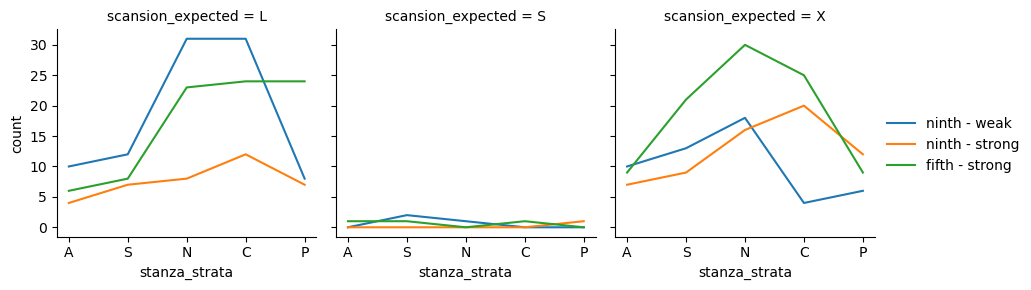

In [26]:
import seaborn as sns

#sns.lineplot(x='stanza_strata', y='count', hue='stem_class', data=df_stem_strata_counts)

g = sns.FacetGrid(col='scansion_expected', data=df_stem_strata_counts)
g.map(sns.lineplot, 'stanza_strata', 'count', 'stem_class')
g.add_legend()

#### Stem vowel in expected long (L) positions

For the ninth class, seems to be that usage of weak stem in long syllables jumps significantly over time (specifcally from strophic to normal strata), compared to the same for strong. TODO ensure that this is not because of a bias (eg: thematic/person shifts)

It's also interesting that weak ninth class patterns with strong fifth class -- the vowel in strong fifth is `o` (considered long, historically from diphthong `*au`).

#### Stem vowel in expected short (S) positions

Counts for all the stem classes are very low, and is just a reiteration of the numbers we saw in analysis section 3.  

#### Stem vowel in expected short/long (X) positions

No discernible pattern.

#### Attestations of ninth class weak stems for normal (N) strata

To inspect that jump during normal is not biased towards a specific stem / hymn.

In [20]:
df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .query('\
        present_class== "ninth" \
        and stem_type == "weak" \
        and meter_stem_vowel_position_scansion_expected == "L" \
        and stanza_strata == "N" \
    ') \
    .sort_values(["stem", "line_no"]) \
    #.groupby("stem").size() 

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_late_addition,word,word_gloss
124,ninth,weak,gr̥ṇī,01.015.03.a,abhí yajñáṁ gr̥ṇīhi no,Gāyatrī,SS LL |SLS L,L,S,"[5, 6]",,,False,MO,N,,gr̥ṇīhi,2.SG.PRS.IMP.ACT
133,ninth,weak,gr̥ṇī,02.009.04.b,chruṣṭī́ deṣṇám abhí gr̥ṇīhi rā́dhaḥ,Triṣṭubh,"LL LS,_SS S|LS LL",L,X,"[7, 8]",,caesura_position_inside_syllable=True,False,M,N,,gr̥ṇīhi,2.SG.PRS.IMP.ACT
136,ninth,weak,gr̥ṇī,02.033.12.c,bhū́rer dātā́raṁ sátpatiṁ gr̥ṇīṣe,Triṣṭubh,"LL LLL ,LS|L SLL",L,S,"[9, 10]",,,False,M,N,,gr̥ṇīṣe,1.SG.PRS.IND.MED
140,ninth,weak,gr̥ṇī,04.025.07.b,ásunvatā sutapā́ḥ sáṁ gr̥ṇīte,Triṣṭubh,"SLSL ,SSL |L SLL",L,S,"[9, 10]",,,False,M,N,,gr̥ṇīte,3.SG.PRS.IND.MED
141,ninth,weak,gr̥ṇī,05.034.09.a,sahasrasā́m ā́gniveśiṁ gr̥ṇīṣe,Triṣṭubh,"SLSL,_LSL|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,N,['Grassmann (G)'],gr̥ṇīṣe,1.SG.PRS.IND.MED
161,ninth,weak,gr̥ṇī,10.092.14.b,gīrbhír u ̀ sváyaśasaṁ gr̥ṇīmasi,Jagatī,"LS_S · ,SSS|L SLSS",L,S,"[9, 10]",,,False,M,N,,gr̥ṇīmasi,1.PL.PRS.IND.ACT
191,ninth,weak,punī,01.015.02.b,potrā́d yajñám punītana,Gāyatrī,LL LL |SLSS,L,S,"[5, 6]",,,False,MO,N,,punītana,2.PL.PRS.IMP.ACT
195,ninth,weak,punī,09.004.04.a,pávītāraḥ punītána,Gāyatrī,SLLL |SLSS,L,S,"[5, 6]",,,False,MO,N,,punītána,2.PL.PRS.IMP.ACT
196,ninth,weak,punī,09.011.05.b,sutáṁ sómam punītana,Gāyatrī,SL LL |SLSS,L,S,"[5, 6]",,,False,MO,N,,punītana,2.PL.PRS.IMP.ACT
199,ninth,weak,punī,09.062.29.a,índrāyéndum punītana,Gāyatrī,LLLL |SLSS,L,S,"[5, 6]",,,False,MO,N,,punītana,2.PL.PRS.IMP.ACT
